In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from salicon.salicon import SALICON
from saliconeval.eval import SALICONEval
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [10]:
import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [11]:
dataDir='.'
dataType='train2014examples'
algName = 'fake'
annFile='%s/annotations/fixations_%s.json'%(dataDir,dataType)
subtypes=['results', 'evalImgs', 'eval']
[resFile, evalImgsFile, evalFile]= ['%s/results/fixations_%s_%s_%s.json'%(dataDir,dataType,algName,subtype) for subtype in subtypes]

In [12]:
# create coco object and cocoRes object
salicon = SALICON(annFile)
saliconRes = salicon.loadRes(resFile)

loading annotations into memory...
0:00:00.038057
creating index...
index created!
Loading and preparing results...     
DONE (t=0.00s)
creating index...
index created!


In [13]:
# create cocoEval object by taking coco and cocoRes
saliconEval = SALICONEval(salicon, saliconRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
saliconEval.params['image_id'] = saliconRes.getImgIds()

# evaluate results
saliconEval.evaluate()


# print output evaluation scores
print "Final Result for each Metric:"
for metric, score in saliconEval.eval.items():
    print '%s: %.3f'%(metric, score)

setting up scorers...
computing NSS score...
NSS: 1.078
computing SAUC score...
SAUC: 0.670
computing CC score...
CC: 0.621
computing AUC score...
AUC: 0.709
computing KL score...
KL: 0.000
Final Result for each Metric:
SAUC: 0.670
CC: 0.621
AUC: 0.709
NSS: 1.078
KL: 0.000


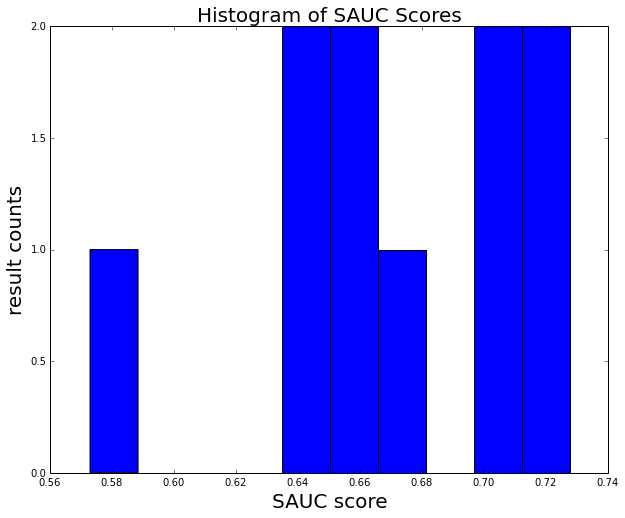

In [6]:
# plot score histogram
saucScores = [eva['SAUC'] for eva in saliconEval.evalImgs]
plt.hist(saucScores)
plt.title('Histogram of SAUC Scores', fontsize=20)
plt.xlabel('SAUC score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [14]:
# save evaluation results to ./results folder
json.dump(saliconEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(saliconEval.eval,     open(evalFile, 'w'))